In [9]:
import numpy as np
import pandas as pd
import warnings

In [10]:
warnings.filterwarnings('ignore')

In [11]:
# read the dataset
columns = ['user id','item id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep = '\t', names = columns)

In [12]:
df.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
print(df.shape)
print(df['user id'].nunique())
print(df['item id'].nunique())

(100000, 4)
943
1682


In [14]:
# need another table for movie titles corresponding to item id
movie_titles = pd.read_csv('ml-100k/u.item', sep = '\|', header = None)

In [15]:
movie_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# getting first 2 columns
movie_titles = movie_titles[[0,1]]

In [17]:
movie_titles.columns = ['item id', 'title']
movie_titles.head()

,item id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [21]:
df = pd.merge(df, movie_titles, on = "item id")

In [22]:
# Now, onto some exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [35]:
df.groupby('title').mean()['rating'].sort_values(ascending = False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [45]:
df.groupby('title').count()['rating'].sort_values(ascending = False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [47]:
# making proper dataframes
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [48]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [49]:
ratings['count of ratings'] =  pd.DataFrame(df.groupby('title').count()['rating'])

In [50]:
ratings.head()

,rating,count of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


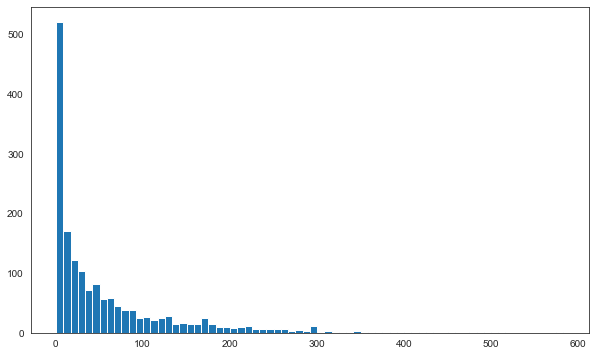

In [60]:
plt.figure(figsize=(10,6))
plt.hist(ratings['count of ratings'], bins = 70)
plt.show()

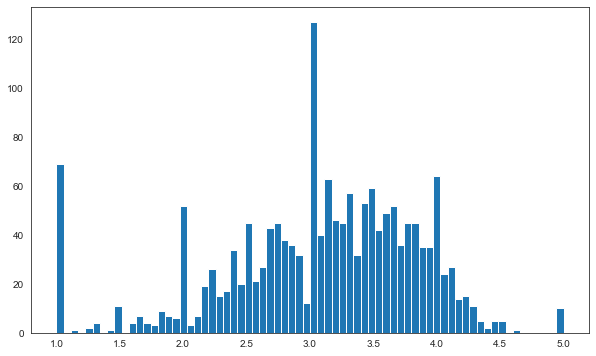

In [61]:
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'], bins = 70)
plt.show()

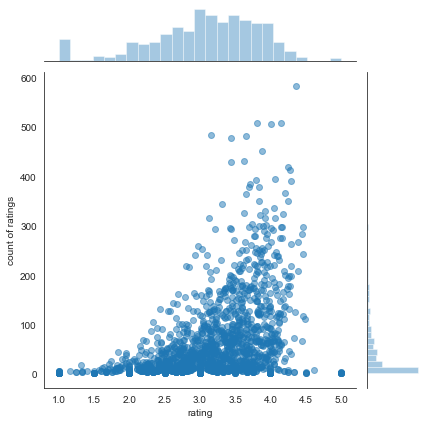

In [62]:
sns.jointplot(x='rating',y='count of ratings',data=ratings, alpha = 0.5)

In [63]:
# Now movie recommendations
movie_mat = df.pivot_table(index = 'user id', columns = 'title', values = 'rating')

In [64]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [67]:
starwars_ratings = movie_mat['Star Wars (1977)']

In [69]:
similar_to_starwars = movie_mat.corrwith(starwars_ratings)
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [75]:
corr_of_starwars = pd.DataFrame(similar_to_starwars, columns = ['correlation'])

In [76]:
corr_of_starwars.dropna(inplace = True)

In [84]:
corr_of_starwars.sort_values('correlation', ascending = False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [86]:
# we need to filter for movies that are rated by atleast 100 people for our correlation to make sense
corr_of_starwars= corr_of_starwars.join(ratings['count of ratings'])

In [88]:
corr_of_starwars[corr_of_starwars['count of ratings']>100].sort_values('correlation', ascending = False)

,correlation,count of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [90]:
# function to recommend movies

def predict_movies(movie_name):
    movie_ratings = movie_mat[movie_name] # get individual movie ratings
    similar_to_movie = movie_mat.corrwith(movie_ratings) # correlate with other movie ratings
    corr_of_movie = pd.DataFrame(similar_to_movie, columns = ['correlation']) # convert correlation series to dataframe
    corr_of_movie.dropna(inplace = True) # remove NaN values
    corr_of_movie= corr_of_movie.join(ratings['count of ratings']) # join with number of counts 
    predictions = corr_of_movie[corr_of_movie['count of ratings']>100].sort_values('correlation', ascending = False) # filter movies greater than 100 ratings
    return predictions
    

In [91]:
predict_movies("Titanic (1997)")

,correlation,count of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
...,...,...
Raging Bull (1980),-0.223660,116
Jackie Brown (1997),-0.236841,126
Brazil (1985),-0.243532,208
